# Машинное обучение
## Лабораторная работа №3
### Выполнил студент группы 15-В-1
### Суворкин П.А.
### Вариант №12

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import pearsonr, spearmanr


## 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


In [2]:
df = pd.read_csv('day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Представлены данные об аренде велосипедов. Данные описывают дату начала ренты, на сколько суток, в какое время года, месяц, день недели, и сопутствующие погодные условия. 
-------------------------------------------------------------------------------------------------------------------------------------
Переменная:         Описание:	                                                                     Параметр:

dteday	            дата	                                                                         Дискретный

season	            Время года(1-весна, 2-лето, 3-осень, 4-зима)	                                 Дискретный

yr	                Год (0:2011, 1:2012)	                                                         Дискретный(бинарный)

mnth	            Месяц(1-12)	                                                                     Дискретный

hr	                Час обращения за арендой (0-23)	                                                 Дискретный

holiday	            Данные о погоде актуальны на выходные? (1-да, 0-нет)	                         Дискретный(бинарный)

weekday	            День недели в который поступило обращение (1-7)	                                 Дискретный

workingday	        День-не выходной и не праздник(1) иначе (0)	                                     Дискретный(бинарный)

weathersit	        1-замечательная погода(солнечно, сухо,безоблачно), 
                    2-неплохая погода(лёгкий туман, малооблачно),                                    Дискретный
                    3-неблагоприятная погода(снегопад, гроза, дождь),
                    4-ужасная погода(ливень, шторм, гололёд, сильный снегопад)	                     
                    
temp	            Температура в цельсиях(t/41) (41-MAX) (значения 0-1)	                         Вещественный

atemp	            Ощущаемая температура в цельсиях(t/50) (50-MAX) (значения 0-1)	                 Вещественный

hum	                Влажность (1-100%)	                                                             Вещественный

windspeed	        Скорость ветра (V/67) (67-MAX) (значения 0-1)	                                 Вещественный

casual	            Клиенты пользуются услугой впервые	                                             Дискретный

registered	        Зарегистрированные клиенты (уже не первый раз)	                                 Дискретный

cnt	                Количество арендованных велосипедов            	                                 Дискретный
---------------------------------------------------------------------------------------------------------------------------------- 

Можем убрать первый столбец (дата) т.к. у нас уже есть данные о годе, месяце, дне недели. Этот столбец не пригодится при решении задачи регресии.



In [3]:
#выкидываем столбец дата
df.drop('dteday', axis=1, inplace=True)
df.drop('instant', axis=1, inplace=True)
df.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (731, 14)


season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64

## 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции 

In [5]:
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size:  (731, 14)


Как видно, дубликатов в наборе данных не обнаружено (dataset size остался неизменным)

## 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию) 

In [6]:
# выделим категориальные и числовые признаки
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorial:  []


все признаки -числовые.

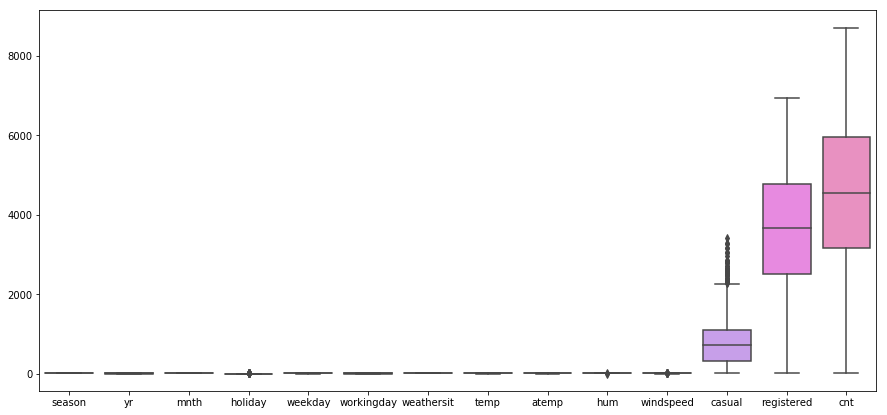

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[numerical_columns])
plt.show()

время года и погода обозначены через ключи, поэтому они должны относиться к категориальным признакам. Преобразуем эти столбцы к строковому виду 

In [8]:
df['season'] = df['season'].apply(lambda x: str(x))
df['weathersit'] = df['weathersit'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorial:  ['season', 'weathersit']


В качестве способа масштабирования выберем метод нормализации.

In [9]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0.0,0.0,0.0,1.000000,0.0,2,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,1,0.0,0.0,0.0,0.000000,0.0,2,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,1,0.0,0.0,0.0,0.166667,1.0,1,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,1,0.0,0.0,0.0,0.333333,1.0,1,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,1,0.0,0.0,0.0,0.500000,1.0,1,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546
5,1,0.0,0.0,0.0,0.666667,1.0,1,0.180948,0.202329,0.532916,0.138482,0.025235,0.216286,0.182237
6,1,0.0,0.0,0.0,0.833333,1.0,2,0.171197,0.170340,0.512798,0.301676,0.042840,0.193763,0.171192
7,1,0.0,0.0,0.0,1.000000,0.0,2,0.131919,0.109191,0.550985,0.503869,0.019366,0.125758,0.107800
8,1,0.0,0.0,0.0,0.000000,0.0,1,0.098690,0.048706,0.446444,0.700017,0.015258,0.107999,0.092039
9,1,0.0,0.0,0.0,0.166667,1.0,1,0.114266,0.094271,0.496573,0.414115,0.011444,0.181923,0.149448


In [10]:
# выведем уникальные значения 
for i in categorial_columns:
    print(i,': ', df[i].unique())


season :  ['1' '2' '3' '4']
weathersit :  ['2' '1' '3']


Уникальных значений оказалось не много, поэтмому можно применить dummy-кодирование

In [11]:
df_categorial = pd.get_dummies(df[categorial_columns])
df.drop(categorial_columns, axis=1, inplace=True)
df = pd.concat([df_categorial, df] , axis=1)

print(df.shape)
df.head()

(731, 19)


,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,1,0,0.0,0.0,0.0,1.000000,0.0,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792
1,1,0,0,0,0,1,0,0.0,0.0,0.0,0.000000,0.0,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623
2,1,0,0,0,1,0,0,0.0,0.0,0.0,0.166667,1.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669
3,1,0,0,0,1,0,0,0.0,0.0,0.0,0.333333,1.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174
4,1,0,0,0,1,0,0,0.0,0.0,0.0,0.500000,1.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546


### 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других
 

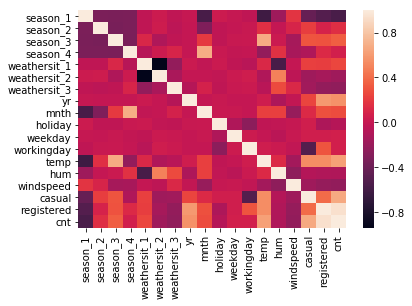

In [12]:
df_corr = df.drop('atemp',axis=1).corr()
sns.heatmap(df_corr)
plt.show()

In [13]:
df_corr


,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
season_1,1.000000,-0.332716,-0.337549,-0.325466,-0.023951,0.032441,-0.022764,0.002385,-0.569733,0.034158,0.000783,-0.025926,-0.619800,-0.181336,0.178154,-0.429106,-0.510300,-0.563094
season_2,-0.332716,1.000000,-0.341267,-0.329051,-0.023167,0.038836,-0.043136,-0.000793,-0.314015,-0.024265,-0.002355,0.014543,0.155424,-0.003854,0.097513,0.218013,0.085578,0.146197
season_3,-0.337549,-0.341267,1.000000,-0.333831,0.109927,-0.102723,-0.026247,-0.000805,0.199855,-0.026247,0.010177,0.016218,0.678471,0.023101,-0.139732,0.303945,0.296440,0.346487
season_4,-0.325466,-0.329051,-0.333831,1.000000,-0.064433,0.032716,0.093240,-0.000776,0.686954,0.016915,-0.008771,-0.005149,-0.224793,0.162732,-0.135466,-0.098448,0.124764,0.065593
weathersit_1,-0.023951,-0.023167,0.109927,-0.064433,1.000000,-0.938964,-0.226050,0.029429,-0.021960,0.028875,-0.029379,-0.059165,0.116091,-0.575317,-0.003964,0.221928,0.216298,0.252870
weathersit_2,0.032441,0.038836,-0.102723,0.032716,-0.938964,1.000000,-0.122859,-0.003869,-0.005365,-0.018972,0.024074,0.050099,-0.097706,0.491834,-0.037408,-0.167439,-0.140962,-0.172879
weathersit_3,-0.022764,-0.043136,-0.026247,0.093240,-0.226050,-0.122859,1.000000,-0.073941,0.078543,-0.029577,0.016586,0.028820,-0.058238,0.267011,0.117362,-0.166103,-0.224835,-0.239958
yr,0.002385,-0.000793,-0.000805,-0.000776,0.029429,-0.003869,-0.073941,1.000000,-0.001792,0.007954,-0.005461,-0.002013,0.047604,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,-0.569733,-0.314015,0.199855,0.686954,-0.021960,-0.005365,0.078543,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.220205,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.034158,-0.024265,-0.026247,0.016915,0.028875,-0.018972,-0.029577,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.028556,-0.015937,0.006292,0.054274,-0.108745,-0.068348


По диаграмме видно, что (weathersit_1) "замечательная погода" сильно коррелирует с (weathersit_2) "хорошая погода" . Поэтому удалим weathersit_1 из датасета.

In [14]:
df.drop('weathersit_1', axis=1, inplace=True)

### 6) Заполните пропущенные значения в данных 

In [15]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (731, 18)


season_1        731
season_2        731
season_3        731
season_4        731
weathersit_2    731
weathersit_3    731
yr              731
mnth            731
holiday         731
weekday         731
workingday      731
temp            731
atemp           731
hum             731
windspeed       731
casual          731
registered      731
cnt             731
dtype: int64

### 7) Решите поставленную задачу регрессии в соответствии с заданием
 

* Линейная регрессия без использования регуляризаторов
* Линейная регрессия, RIDGE регуляризатор

In [16]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop(['cnt', 'registered','casual'],axis=1), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Линейная регрессия без использования регуляризаторов

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

703   -0.042512
33    -0.028333
300   -0.064053
456   -0.136079
633   -0.091144
557   -0.046193
39    -0.110954
356   -0.028710
559   -0.070177
514    0.129650
729    0.105230
355   -0.109592
164   -0.038198
697    0.024330
66     0.005058
Name: cnt, dtype: float64


In [18]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.918466494964
spearmen correlation:  0.931614361779


Линейная регрессия, RIDGE регуляризатор

In [19]:
import warnings
warnings.filterwarnings("ignore")

regr = linear_model.Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
regr_grid = GridSearchCV(regr, params)
regr_grid.fit(X_train, y_train)
best_alpha = regr_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.4


In [20]:
regr = linear_model.Ridge(alpha=best_alpha)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

703   -0.044598
33    -0.024419
300   -0.064848
456   -0.137869
633   -0.096137
557   -0.043417
39    -0.107424
356   -0.025123
559   -0.069666
514    0.125353
729    0.111383
355   -0.108201
164   -0.042941
697    0.023823
66     0.005401
Name: cnt, dtype: float64


In [21]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.919290795251
spearmen correlation:  0.93287130236
